In [18]:
import json 
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import seaborn as sns
import pandas as pd
import statistics

In [26]:
model_name = ["mistralai/Mixtral-8x7B-Instruct-v0.1", #0
              "meta-llama/Meta-Llama-3-8B-Instruct", #1
              "meta-llama/Meta-Llama-3.1-8B-Instruct", #2
             "meta-llama/Meta-Llama-3.1-70B-Instruct", #3
             "google/gemma-2-9b-it"] #4

i = 0
all_results=[]

options = 2 #1 for mirostat, 2 for top k top p 
language = "fi"

with open("./gridsearch_output/"+model_name[4]+"_on_"+language+"_"+str(options)+"final_final.jsonl", "r") as f:
    for idx, line in enumerate(f):
        line = json.loads(line)
        all_results.append(line)

print(idx)

results=[]
param = all_results[0]["parameters"]

idx = 200

cers_model=[]
cers_input=[]
#cers_model_median=[]
#cers_input_median=[]
cer_m=0
cer_i=0
#median_m=[]
#median_i=[]

improvement = []
improvement_median = []

imp = 0
overall_len = 0

for i, result in enumerate(all_results):
    if (i+1)%idx!=0:
        cer_m+=result["scores"]["model_vs_GT"]
        cer_i+=result["scores"]["input_vs_GT"]
        #median_m.append(result["scores"]["model_vs_GT"])
        #median_i.append(result["scores"]["input_vs_GT"])
        imp += max(min((result["scores"]["input_vs_GT"]-result["scores"]["model_vs_GT"])/result["scores"]["input_vs_GT"], 1),-1) * len(result["originals"]["input"])
        overall_len+=len(result["originals"]["input"])
                                                                                                                                
        continue
    else:
        results.append(result)
        cers_model.append(cer_m/idx)
        #print(i)
        cers_input.append(cer_i/idx)

        #median_m.sort()
        #median_i.sort()
        #cers_model_median.append(median_m[idx//2])
        #cers_input_median.append(median_i[idx//2])
        
        improvement.append(imp/overall_len)
        #improvement_median.append(max(min((median_i[idx//2]-median_m[idx//2])/median_i[idx//2], 1),-1))

        #median_m=[]
        #median_i=[]
        cer_m=0
        cer_i=0
        imp=0
        overall_len=0


19999


In [27]:
temp_imp = 0
overall_len = 0

temps_imps = []
topk_imps = []
topp_imps = []

for i in range(len(model_name)):
    model_temps_imps = []
    model_topk_imps = []
    model_topp_imps = []
    
    with open("./gridsearch_output/"+model_name[i]+"_on_"+language+"_"+str(options)+"final_final.jsonl", "r") as f:
        for idx, line in enumerate(f):
            line = json.loads(line)
            temp_imp += max(min((line["scores"]["input_vs_GT"] - line["scores"]["model_vs_GT"]) / line["scores"]["input_vs_GT"], 1), -1) * len(line["originals"]["input"])
            overall_len += len(line["originals"]["input"])

            if (idx + 1) % 200 == 0:
                improvement = temp_imp / overall_len if overall_len != 0 else 0

                current_temp = line["parameters"]["temperature"]
                current_topk = line["parameters"]["top_k"]
                current_topp = line["parameters"]["top_p"]

                model_temps_imps.append((current_temp, improvement))
                model_topk_imps.append((current_topk, improvement))
                model_topp_imps.append((current_topp, improvement))
                
                temp_imp = 0
                overall_len = 0

    # Sort and select top 10 for each model
    top_10_temps = sorted(model_temps_imps, key=lambda x: x[1], reverse=True)[:10]
    top_10_topk = sorted(model_topk_imps, key=lambda x: x[1], reverse=True)[:10]
    top_10_topp = sorted(model_topp_imps, key=lambda x: x[1], reverse=True)[:10]

    # Add the top 10 for each model into the combined list
    temps_imps.extend(top_10_temps)
    topk_imps.extend(top_10_topk)
    topp_imps.extend(top_10_topp)

# Final results after combining top 10 from all models
print('Combined top 10 temperatures from all models:', ', '.join([f"\nTemp: {temp}, Imp: {imp}\n" for temp, imp in temps_imps]))

print('Combined top 10 top_k from all models:', ', '.join([f"\nTop_k: {topk}, Imp: {imp}\n" for topk, imp in topk_imps]))
print('Combined top 10 top_p from all models:', ', '.join([f"\nTop_p: {topp}, Imp: {imp}\n" for topp, imp in topp_imps]))

# Extract just the temperature, top_k, and top_p values
temp_values = [temp for temp, _ in temps_imps]
topk_values = [topk/100 for topk, _ in topk_imps]
topp_values = [topp for topp, _ in topp_imps]

# Calculate and print the medians
median_temp = statistics.median(temp_values)
median_topk = statistics.median(topk_values)
median_topp = statistics.median(topp_values)

print(f'Median temperature: {median_temp}')
print(f'Median top_k: {median_topk}')
print(f'Median top_p: {median_topp}')


Combined top 10 temperatures from all models: 
Temp: 0.07438240895126863, Imp: -0.7594090850915203
, 
Temp: 0.13720471641752266, Imp: -0.7664611969790374
, 
Temp: 0.49752043296494874, Imp: -0.7685040001508109
, 
Temp: 0.09515780965624959, Imp: -0.768936074997673
, 
Temp: 0.015635811358545526, Imp: -0.7732206970362387
, 
Temp: 0.9819036632165138, Imp: -0.7740754619902065
, 
Temp: 0.28795426384840384, Imp: -0.7754620595295078
, 
Temp: 0.17032938376752285, Imp: -0.7762392283244122
, 
Temp: 0.2959261657228186, Imp: -0.7810511100401425
, 
Temp: 0.01513892971319885, Imp: -0.7817053259513123
, 
Temp: 0.16271012233078538, Imp: -0.7626143747541256
, 
Temp: 0.08638588677253212, Imp: -0.7670158878214548
, 
Temp: 0.15183278224907512, Imp: -0.7685714524368112
, 
Temp: 0.1667703108119687, Imp: -0.7691912677400421
, 
Temp: 0.16506207194507355, Imp: -0.770853292570628
, 
Temp: 0.24489572295593362, Imp: -0.77195630930961
, 
Temp: 0.24635864439919464, Imp: -0.7742360373532648
, 
Temp: 0.1798042036804469

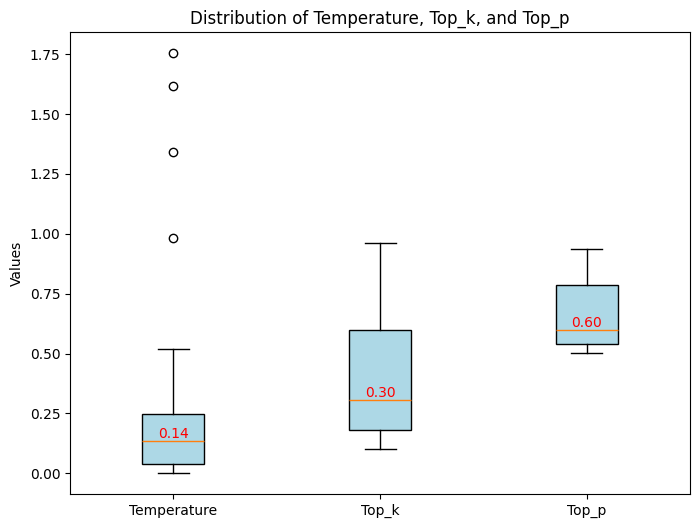

In [28]:
data = [temp_values, topk_values, topp_values]

labels = ['Temperature', 'Top_k', 'Top_p']

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Distribution of Temperature, Top_k, and Top_p')
plt.ylabel('Values')

for i, values in enumerate(data):
    median_value = statistics.median(values)
    plt.text(i + 1, median_value, f'{median_value:.2f}', ha='center', va='bottom', color='red')

plt.show()

In [25]:
print(cers_model)
print(cers_input)

[0.059524588733690334, 0.05917125257099798, 0.06160354240776196, 0.060119767305110594, 0.06047035973301374, 0.05909682784757133, 0.05906464327233624, 0.060380907731551046, 0.06100457253387295, 0.05912218722946106, 0.0591668218322933, 0.05915989197233593, 0.05931427790439812, 0.06044911668728272, 0.05946001420190346, 0.06063433322101886, 0.059169770278486335, 0.05965892374351758, 0.060435962109179495, 0.05922313598954668, 0.06059666036223216, 0.059425710289305246, 0.05913354559041255, 0.059517708766224725, 0.05931024743276869, 0.060022178389537356, 0.059507735599236854, 0.05903921183513114, 0.05917641254513492, 0.06020459321218149, 0.058763354288540647, 0.06027178705377827, 0.05991131427907408, 0.06027868292791842, 0.06013229632169136, 0.060500842518561006, 0.05963841780977394, 0.05975219609416221, 0.060056907014785776, 0.05898673962581614, 0.05943057216573884, 0.059330281042648016, 0.05926900946032171, 0.05889039312580646, 0.058758033485850084, 0.0600482779930888, 0.05883215632012374, 

In [3]:
mirostat = []
mirostat_tau=[]
mirostat_eta=[]

top_k = []
top_p = []

temperature=[]


lowest_score = 1
lowest_score_index = 0

if options==1:
    for index, elt in enumerate(results):
        temperature.append(elt["parameters"]["temperature"]) 
        if elt["parameters"]["mirostat"] !=0 :
            try:
                #overlap_percentage.append(elt["parameters"]["overlap_percentage"])
                #extend_gap_score.append(elt["parameters"]["extend_gap_score"])
                #open_gap_score.append(elt["parameters"]["open_gap_score"])
                mirostat.append(elt["parameters"]["mirostat"])
                mirostat_tau.append(elt["parameters"]["mirostat_tau"])
                mirostat_eta.append(elt["parameters"]["mirostat_eta"])
                
                #window_size.append(elt["parameters"]["window_size"])
            except:
                None
        else:
            mirostat.append(0)
            mirostat_tau.append(0)
            mirostat_eta.append(0)
elif options==2:
    for index, elt in enumerate(results):
        temperature.append(elt["parameters"]["temperature"]) 
        top_k.append(elt["parameters"]["top_k"])
        top_p.append(elt["parameters"]["top_p"])

print(mirostat_eta)
print(top_k)

[]
[77, 44, 17, 86, 87, 40, 55, 29, 82, 94, 34, 62, 61, 68, 44, 10, 46, 44, 30, 23, 48, 63, 53, 72, 35, 61, 53, 38, 68, 75, 97, 95, 98, 41, 81, 48, 89, 71, 49, 23, 20, 27, 11, 15, 16, 23, 15, 15, 27, 20, 13, 32, 19, 24, 38, 14, 17, 13, 25, 10, 31, 35, 19, 38, 35, 13, 28, 22, 41, 42, 55, 37, 33, 45, 51, 15, 29, 21, 25, 18, 56, 12, 18, 16, 42, 14, 10, 88, 81, 26, 17, 51, 57, 64, 39, 47, 59, 52, 36, 50]


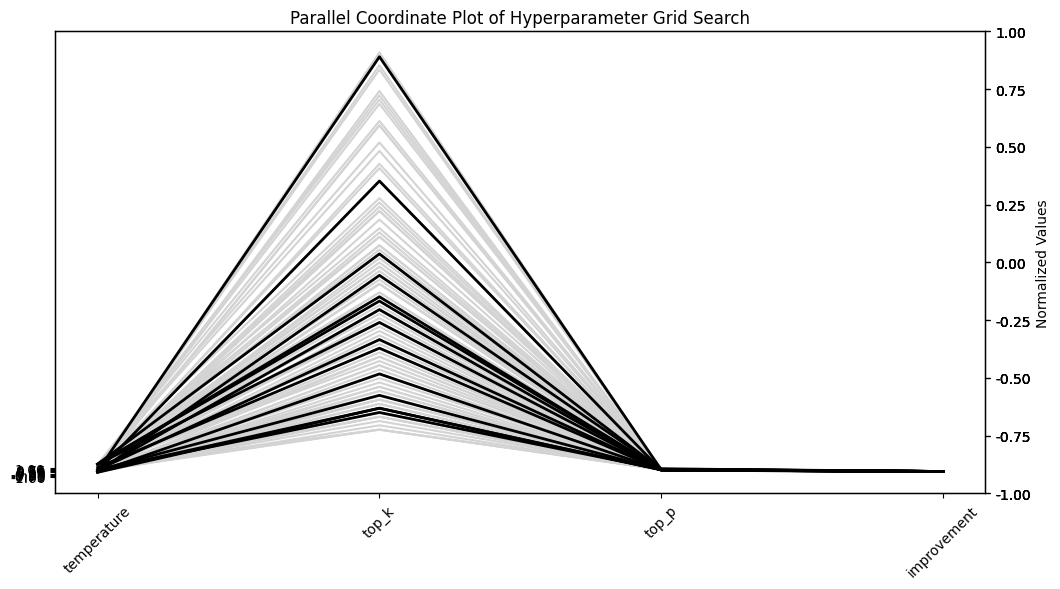

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data representing the hyperparameter grid search results

if options==1:
    data = {
        'temperature': temperature,
        'mirostat': mirostat,
        'mirostat_tau': mirostat_tau,
        'mirostat_eta': mirostat_eta,
        #'character_error_rate': cers_model, 
        #'improvement_with_median': improvement_median, 
        
        #'cer_median_model': cers_model_median,
        #'cer_median_input': cers_input_median,
        #'cer_average_model': cers_model, 
        #'cer_average_input': cers_input,
        'improvement': improvement,
    }
elif options==2:
    data = {
        'temperature': temperature,
        'top_k': top_k,
        'top_p': top_p,
        #'character_error_rate': cers_model, 
        #'improvement_with_median': improvement_median, 
        
        #'cer_median_model': cers_model_median,
        #'cer_median_input': cers_input_median,
        #'cer_average_model': cers_model, 
        #'cer_average_input': cers_input,
        'improvement': improvement,
    }

'''print(len(window_size))
print(len(do_sample))
print(len(temperature))
print(len(beam_search))
print(len(num_beams))
print(len(wer))
print(len(coverage_avg))'''

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)
#print(df)
# Normalize the data for plotting purposes
df_normalized = df.copy()
maxVal = 1.0
df_normalized['improvement'].where(df_normalized['improvement'] <= maxVal, maxVal)

#print(df_normalized['improvement'].max)
for column in df_normalized.columns:
    if (((df_normalized[column].dtype != bool  and column !='coverage') and 'improvement' not in column) and 'cer' not in column) and 1==0:
        df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())

# Define a function to convert boolean to int for plotting
#df_normalized['do_sample'] = df_normalized['do_sample'].astype(int)
#df_normalized['beam_search'] = df_normalized['beam_search'].astype(int)

# Sort the DataFrame based on character error rate
df_sorted = df_normalized.sort_values(by='improvement', ascending=False)

# Split the DataFrame into two parts
df_grey = df_sorted[15:]
df_black = df_sorted[:15]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the grey lines first
for i in range(len(df_grey)):
    ax.plot(df_grey.columns, df_grey.iloc[i], color='lightgrey')

# Plot the black lines on top
for i in range(len(df_black)):
    ax.plot(df_black.columns, df_black.iloc[i], color='black', linewidth=2)

# Customize the axis labels to show actual values
for i, column in enumerate(df.columns):
    values = df[column]
    normalized_values = df_normalized[column]
    tick_positions = np.linspace(-1, 1, num=9)
    tick_labels = np.linspace(-1, 1, num=9)

    # Set the x-axis ticks and labels
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=45)

    # Set the y-axis ticks and labels on the left
    ax.set_yticks(tick_positions)
    ax.set_yticklabels([f"{label:.2f}" for label in tick_labels])

    # Create a secondary y-axis on the right, which shares the same y-axis data
    ax_right = ax.twinx()

    # Set the right y-axis ticks and labels (identical to the left)
    ax_right.set_yticks(tick_positions)
    ax_right.set_yticklabels([f"{label:.2f}" for label in tick_labels])

    # Optional: Customize the appearance of both axes
    ax.tick_params(axis='y', labelsize=10, direction='out')
    ax_right.tick_params(axis='y', labelsize=10, direction='out')




# Label the plot
plt.title('Parallel Coordinate Plot of Hyperparameter Grid Search')
plt.xlabel('Parameters')
plt.ylabel('Normalized Values')

plt.show()


In [5]:
print(df_black)

    temperature  top_k     top_p  improvement
54     0.560091     38  0.699480     0.236382
30     0.339335     97  0.608108     0.234477
55     0.599968     14  0.703706     0.230875
79     0.555216     18  0.603232     0.229900
46     0.038874     15  0.636041     0.229499
61     1.904630     35  0.754101     0.229420
43     0.460177     15  0.609511     0.229288
68     1.881397     41  0.670155     0.228557
39     0.101445     23  0.553339     0.228418
5      1.977753     40  0.756264     0.228393
74     1.951980     51  0.630228     0.228193
16     0.074598     46  0.850712     0.227991
28     0.327539     68  0.537646     0.227821
76     1.156703     29  0.614352     0.226384
60     0.624854     31  0.685928     0.226364


/usr/local/lib64/python3.9/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


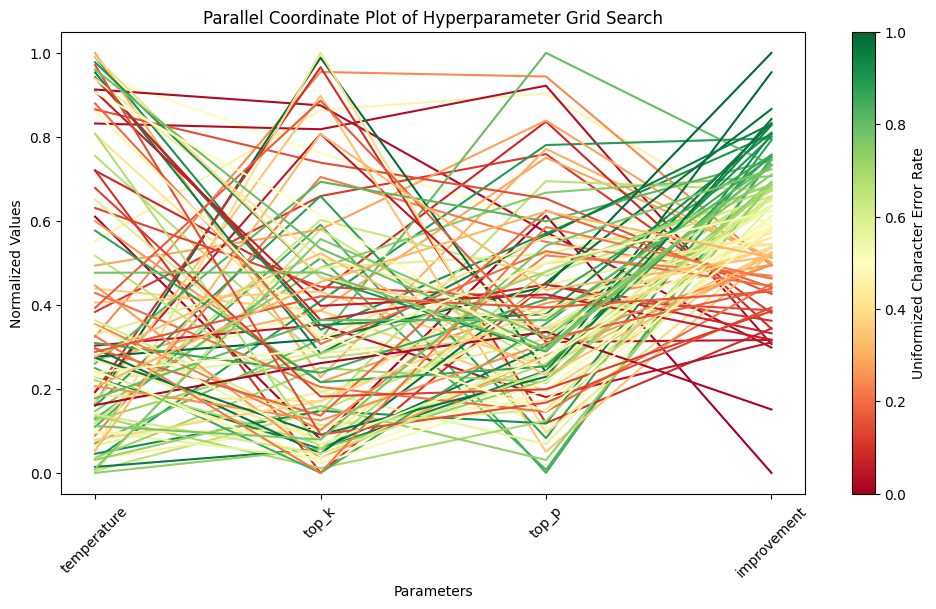

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import QuantileTransformer
import matplotlib.colors as mcolors
# Sample data representing the hyperparameter grid search results

if options==1:
    data = {
        #'window_size': window_size,
        #'overlap_percentage': overlap_percentage,
        'temperature': temperature,
        #'extend_gap_score': extend_gap_score,
        #'open_gap_score': open_gap_score, 
        'mirostat': mirostat,
        'mirostat_eta': mirostat_eta,
        'mirostat_tau': mirostat_tau,
        'improvement': improvement, 
        
    }
elif options==2:
    data = {
        #'window_size': window_size,
        #'overlap_percentage': overlap_percentage,
        'temperature': temperature,
        #'extend_gap_score': extend_gap_score,
        #'open_gap_score': open_gap_score, 
        'top_k': top_k,
        'top_p': top_p, 
        'improvement': improvement, 
        
    }


# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)


# Normalize the data (excluding boolean columns) for better visualization
for column in df.columns:
    if df[column].dtype != bool:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Define a function to convert boolean to int for plotting
#df_normalized['do_sample'] = df_normalized['do_sample'].astype(int)
#df_normalized['beam_search'] = df_normalized['beam_search'].astype(int)


# Use QuantileTransformer to normalize the character error rate
quantile_transformer = QuantileTransformer(output_distribution='uniform')
df['improvement_normalized'] = quantile_transformer.fit_transform(df[['improvement']])

# Determine the colors based on the normalized character error rate
norm = plt.Normalize(df['improvement_normalized'].min(), df['improvement'].max())
colors = plt.cm.RdYlGn(norm(df['improvement_normalized']))

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the parallel coordinates
for i in range(len(df)):
    ax.plot(df.columns[:-1], df.iloc[i, :-1], color=colors[i])

# Add colorbar for reference
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Uniformized Character Error Rate')

# Label the axes
plt.xticks(rotation=45)
plt.title('Parallel Coordinate Plot of Hyperparameter Grid Search')
plt.xlabel('Parameters')
plt.ylabel('Normalized Values')

plt.show()


In [7]:
# 3. Create a DataFrame to group CER values and improvement


# Group by CER ranges (bins) and calculate average improvement for each bin

